<a href="https://colab.research.google.com/github/patyDSantos/baoba_project/blob/main/Baoba_dados_relatorio_geral_vers_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Importar as bibliotecas necessárias

In [18]:
# Importa as bibliotecas necessárias para manipulação de dados e criação de gráficos.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display, clear_output

# Importa o módulo 'drive' do Google Colab, que permite interagir com o Google Drive.
from google.colab import drive

# Carrega a extensão do Colab para uma exibição dos DataFrames e habilita o formatador.
%load_ext google.colab.data_table
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Clona o repositório do projeto Baoba do GitHub e navega até o diretório clonado.
!git clone https://github.com/patyDSantos/baoba_project.git
%cd /content/baoba_project

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table
Cloning into 'baoba_project'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 67 (delta 35), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (67/67), 478.07 KiB | 4.43 MiB/s, done.
Resolving deltas: 100% (35/35), done.
/content/baoba_project


##2. Conectar e montar o seu Google Drive

In [2]:
# Monta o Google Drive no diretório '/content/drive', facilitando o acesso aos arquivos armazenados.
drive.mount('/content/drive')

Mounted at /content/drive


Depois de autorizar, seus arquivos aparecem em
/content/drive/MyDrive/… (seu Drive particular) ou
/content/drive/Shared drives/… (Drives compartilhados).

##3. Conferir / criar a estrutura de pastas e definir variáveis de caminho e nomes de arquivo

##❗Para gerar as tabelas e gráficoso, é preciso indicar o caminho do arquivo de coleta e especificar a pasta onde deseja salvar o gráfico na célula a seguir.


Antes de prosseguir, abra o Google Drive no navegador e confirme:


```
Meu Drive ou Shared Drives
└── <NOME_DO_DRIVE_COMPARTILHADO>
    ├── <PASTA_COM_CSVS>
    │   ├── <arquivo.csv>        ← arquivo a ser processado
    └── <PASTA_DE_SAIDA>
        └── graficos                   ← onde o PNG será salvo
```


Após isso, siga os passos a seguir.

**Copiar no site do Google Drive e ajustar No navegador, abra drive.google.com.**

1.  Abra a pasta.
2.   Copie o “caminho” exibido na barra superior (Ex.: “Meu Drive > dados > abril”).
3. Transforme‑o no formato Colab, acrescentando o caminho após '/content/drive/MyDrive/' conforme o exemplo a seguir:

```
caminho_arquivo = '/content/drive/MyDrive/dados/abril/'
nome_arquivo_atual = 'nome_do_arquivo.csv'

```

ou, se estiver num Drive Compartilhado:

```
caminho_arquivo= '/content/drive/Shareddrives/NOME_DO_DRIVE/dados/abril/'
nome_arquivo_atual = 'nome_do_arquivo.csv'

```
4. Acrescente o caminho no qual o gráfico deverá ser salvo.

```
caminho_arquivo= '/content/drive/Shareddrives/NOME_DO_DRIVE/dados/abril/graficos'
```



Observação: O caminho deve estar entre aspas simples como no exemplo.

✅ Checklist rápido



*   Caminho começa em /content/drive/ (Colab).
*   Nome do arquivo e extensão .csv estão corretos.
*   Caminhos estão entre aspas simples.
*  Cada variável aponta para o arquivo certo (atual e anterior).

##✍ Indique os caminhos abaixo:

In [3]:
#Caminho dos arquivos contendo as bases a serem comparadas
caminho_arquivo = '/content/drive/Shareddrives/arquivo_baoba/abril_2025/primeiro_periodo/'

# Nome dos arquivos
nome_arquivo_atual = 'base.csv'

#Caminhos da Pasta para salvar os gráficos
caminho_salvar_grafico = '//content/drive/Shareddrives/arquivo_baoba/abril_2025/primeiro_periodo/graficos/'

In [4]:
#Cria os dataframes a partir dos arquivos CSV
df    = pd.read_csv(caminho_arquivo + nome_arquivo_atual)
output_folder = caminho_salvar_grafico

In [5]:
# Importa a classe MetricsProcessor do script auxiliar para análise de dados.
from baoba_processamento_dados_geral import ProcessamentoMetricas

# Extração dos monitoramentos da coluna 'monitoramento_nome.keyword'
monitoramentos = df['monitoramento_nome.keyword'].unique().tolist()

#Instância passando os argumentos necessários
analisador = ProcessamentoMetricas(df, monitoramentos)

# Exibe um resumo do DataFrame, mostrando o número de registros, colunas, tipos de dados e uso de memória.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190089 entries, 0 to 190088
Data columns (total 11 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   data                              190089 non-null  object 
 1   monitoramento_nome.keyword        190089 non-null  object 
 2   servico.keyword                   190089 non-null  object 
 3   publicador_nome.keyword           190089 non-null  object 
 4   titulo                            5326 non-null    object 
 5   conteudo.keyword                  188230 non-null  object 
 6   link.keyword                      190089 non-null  object 
 7   manifestacoes_quantidade          190089 non-null  int64  
 8   manifestacoes_detalhadas.keyword  189194 non-null  object 
 9   query                             132330 non-null  object 
 10  interacoes                        189194 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 16.

In [6]:
# Atualizar o nome dos monitoramentos
df['monitoramento_nome.keyword'] = df['monitoramento_nome.keyword'].replace({
    'Igualdade Racial ': 'Igualdade Racial',
    'Acessibilidade e inclusão PCD': 'Acessibilidade e Inclusão PCD',
    'Patrimônio público e probidade administr': 'Patrimônio Público e Probidade Administrativa',
    'Proteção e Inclusão Vulneraveis: ': 'Proteção e Inclusão Vulneráveis',
    'Combate à violência contra a mulher': 'Combate à Violência Contra a Mulher',
    'Desinformação em Políticas Públicas': 'Políticas Públicas'
})

##4. Calcula as interações e ocorrências por serviço e monitoramento

In [7]:
# Calcula Interações para cada serviço utilizando o nome padrão da coluna "servico.keyword"
df_face    = analisador.calcula_interacoes(
    df,
    'Facebook - Posts Públicos',
    ['reactions', 'shares', 'comments'],
    service_col='servico.keyword'  # Pode ser omitido se for "servico.keyword"
)

df_x       = analisador.calcula_interacoes(
    df,
    'X',
    ['favorites', 'replies', 'retweets'],
    service_col='servico.keyword'
)

df_insta   = analisador.calcula_interacoes(
    df,
    'Instagram - Posts Públicos',
    ['likes', 'comments'],
    service_col='servico.keyword'
)

df_youtube = analisador.calcula_interacoes(
    df,
    'YouTube - Vídeos',
    ['likes', 'comments', 'views'],
    service_col='servico.keyword'
)

#Unifica todos os dataframes em um
df_unificado = pd.concat([df_face, df_insta, df_x, df_youtube], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190089 entries, 0 to 190088
Data columns (total 11 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   data                              190089 non-null  object 
 1   monitoramento_nome.keyword        190089 non-null  object 
 2   servico.keyword                   190089 non-null  object 
 3   publicador_nome.keyword           190089 non-null  object 
 4   titulo                            5326 non-null    object 
 5   conteudo.keyword                  188230 non-null  object 
 6   link.keyword                      190089 non-null  object 
 7   manifestacoes_quantidade          190089 non-null  int64  
 8   manifestacoes_detalhadas.keyword  189194 non-null  object 
 9   query                             132330 non-null  object 
 10  interacoes                        189194 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 16.

In [8]:
# ===== OCORRÊNCIAS =====
df_unificado['data'] = pd.to_datetime(df_unificado['data']).dt.strftime('%d-%m-%Y')

df_sumario_ocorrencias = df_unificado.groupby(['monitoramento_nome.keyword', 'data']).agg(
    total_ocorrencias=('monitoramento_nome.keyword', 'count')
).reset_index()

In [9]:
# ===== PICO DE OCORRÊNCIAS =====
ocorrencias_stats = df_sumario_ocorrencias.groupby('monitoramento_nome.keyword').agg(
    media_ocorrencias=('total_ocorrencias', 'mean'),
    desvio_ocorrencias=('total_ocorrencias', 'std')
).reset_index()

ocorrencias_stats['limite_ocorrencias'] = (
    ocorrencias_stats['media_ocorrencias'] + ocorrencias_stats['desvio_ocorrencias']
)

# Juntar estatísticas ao df original
df_ocorrencias = df_sumario_ocorrencias.merge(ocorrencias_stats, on='monitoramento_nome.keyword', how='left')

# Marcar como "PICO" se total_ocorrencias >= limite
df_ocorrencias['pico'] = df_ocorrencias.apply(
    lambda row: 'PICO' if row['total_ocorrencias'] >= row['limite_ocorrencias'] else '', axis=1
)

df_ocorrencias

,monitoramento_nome.keyword,data,total_ocorrencias,media_ocorrencias,desvio_ocorrencias,limite_ocorrencias,pico
0,Acessibilidade e Inclusão PCD,04-04-2025,1664,2648.000,2248.167825,4896.167825,
1,Acessibilidade e Inclusão PCD,05-04-2025,1593,2648.000,2248.167825,4896.167825,
2,Acessibilidade e Inclusão PCD,06-04-2025,1633,2648.000,2248.167825,4896.167825,
3,Acessibilidade e Inclusão PCD,07-04-2025,2203,2648.000,2248.167825,4896.167825,
4,Acessibilidade e Inclusão PCD,08-04-2025,2511,2648.000,2248.167825,4896.167825,
...,...,...,...,...,...,...,...
61,Trabalhadores em Plataformas Digitais,07-04-2025,37,41.125,24.380540,65.505540,
62,Trabalhadores em Plataformas Digitais,08-04-2025,43,41.125,24.380540,65.505540,
63,Trabalhadores em Plataformas Digitais,09-04-2025,33,41.125,24.380540,65.505540,
64,Trabalhadores em Plataformas Digitais,10-04-2025,35,41.125,24.380540,65.505540,


In [10]:
# ===== INTERAÇÕES =====
df_sumario_interacoes = df_unificado.groupby(['monitoramento_nome.keyword', 'data']).agg(
    total_interacoes=('interacoes', 'sum'),
).reset_index()

In [11]:
# ===== PICO INTERAÇÕES =====
interacoes_stats = df_sumario_interacoes.groupby('monitoramento_nome.keyword').agg(
    media_interacoes=('total_interacoes', 'mean'),
    desvio_interacoes=('total_interacoes', 'std')
).reset_index()

interacoes_stats['limite_interacoes'] = (
    interacoes_stats['media_interacoes'] + interacoes_stats['desvio_interacoes']
)

# Juntar estatísticas ao df original
df_interacoes = df_sumario_interacoes.merge(interacoes_stats, on='monitoramento_nome.keyword', how='left')

# Marcar como "PICO" se total_interacoes >= limite
df_interacoes['pico'] = df_interacoes.apply(
    lambda row: 'PICO' if row['total_interacoes'] >= row['limite_interacoes'] else '', axis=1
)

df_interacoes

,monitoramento_nome.keyword,data,total_interacoes,media_interacoes,desvio_interacoes,limite_interacoes,pico
0,Acessibilidade e Inclusão PCD,04-04-2025,201638.0,200837.000,146271.127003,347108.127003,
1,Acessibilidade e Inclusão PCD,05-04-2025,136962.0,200837.000,146271.127003,347108.127003,
2,Acessibilidade e Inclusão PCD,06-04-2025,141091.0,200837.000,146271.127003,347108.127003,
3,Acessibilidade e Inclusão PCD,07-04-2025,176855.0,200837.000,146271.127003,347108.127003,
4,Acessibilidade e Inclusão PCD,08-04-2025,452780.0,200837.000,146271.127003,347108.127003,PICO
...,...,...,...,...,...,...,...
61,Trabalhadores em Plataformas Digitais,07-04-2025,1744.0,1290.375,996.834409,2287.209409,
62,Trabalhadores em Plataformas Digitais,08-04-2025,2378.0,1290.375,996.834409,2287.209409,PICO
63,Trabalhadores em Plataformas Digitais,09-04-2025,845.0,1290.375,996.834409,2287.209409,
64,Trabalhadores em Plataformas Digitais,10-04-2025,292.0,1290.375,996.834409,2287.209409,


##5. Cria e exibe os gráficos

#Gráfico de ocorrências por monitoramento

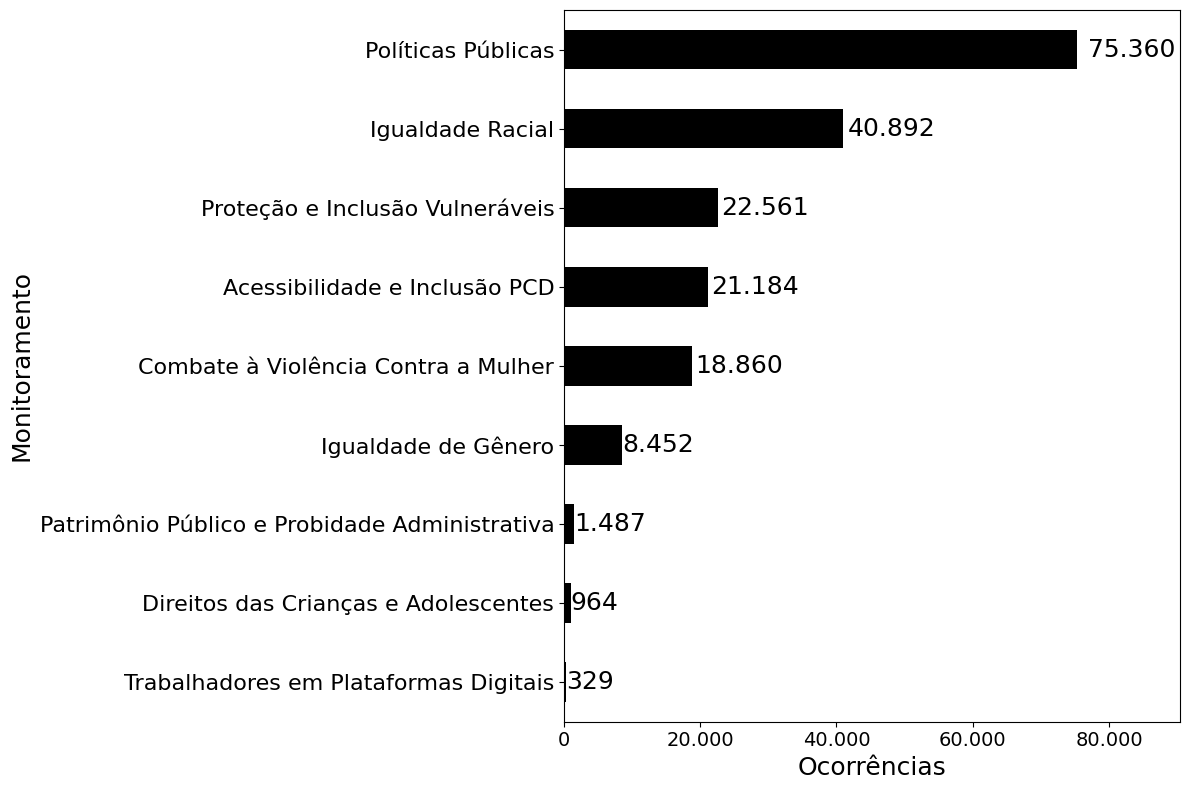

In [12]:
analisador.plota_grafico_ocorrencias_df(
    df_unificado,
    'monitoramento_nome.keyword', # Nome da coluna para agrupar os dados
    title='', # Título do gráfico
    colors='black', # Cor das barras
    log_scale=False, # Escala logarítmica no eixo X
    figsize=(12,8), # Tamanho da figura (valor sugerido, pode ser ajustado)
    fontsize=18,  # Definindo o tamanho da fonte (valor sugerido, pode ser ajustado)
    save_path=output_folder + 'grafico_geral_ocorrencias_monitoramento.png'
)

#Gráfico de interações por monitoramento

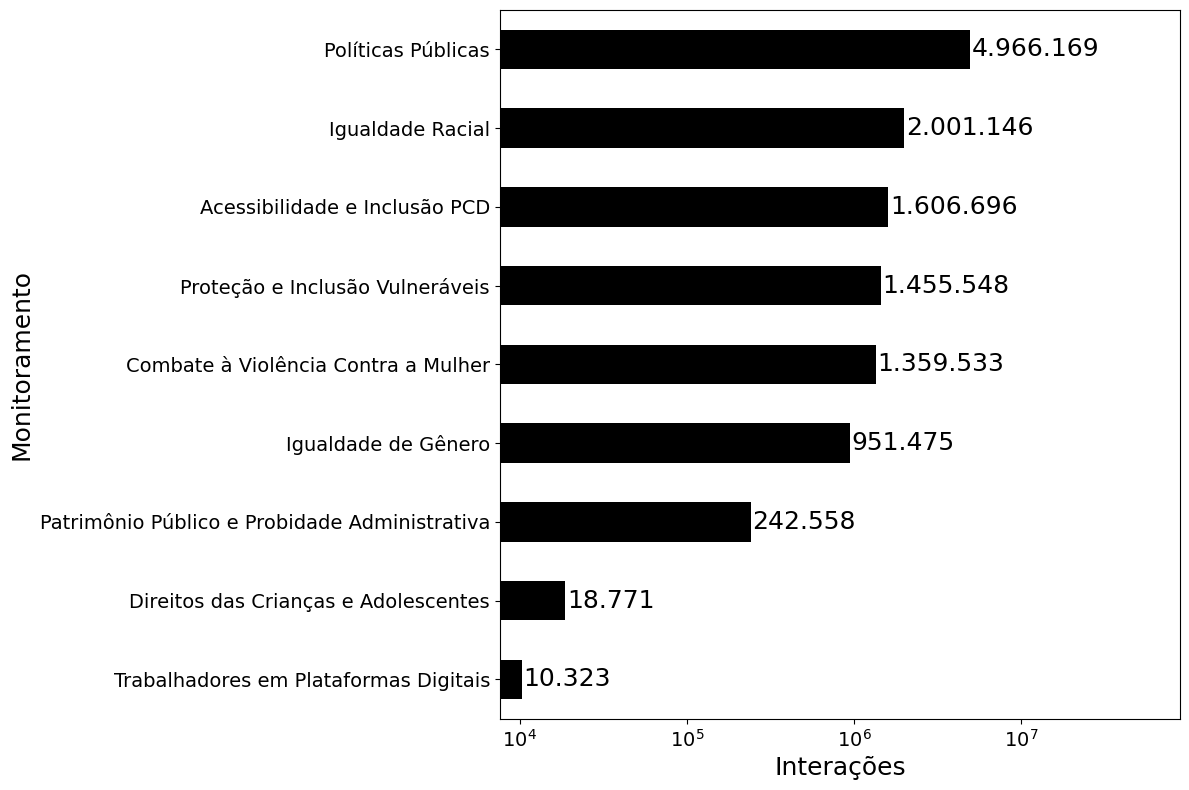

In [13]:
analisador.plota_grafico_interacoes(
    df_unificado,
    monitoramento_col='monitoramento_nome.keyword',  # Nome da coluna para agrupar os dados
    interacoes_col='interacoes',                        # Coluna com os valores a serem somados
    title='',        # Título do gráfico
    colors='black',                                     # Cor das barras
    log_scale=True,                                     # Escala logarítmica no eixo X
    figsize=(12,8),                                     # Tamanho da figura (valor sugerido, pode ser ajustado)
    fontsize=18,  # Definindo o tamanho da fonte (valor sugerido, pode ser ajustado)
    save_path=output_folder + 'grafico_geral_interacoes_monitoramento.png'
)

#Gráfico de ocorrências e interações diárias por monitoramento (linhas)

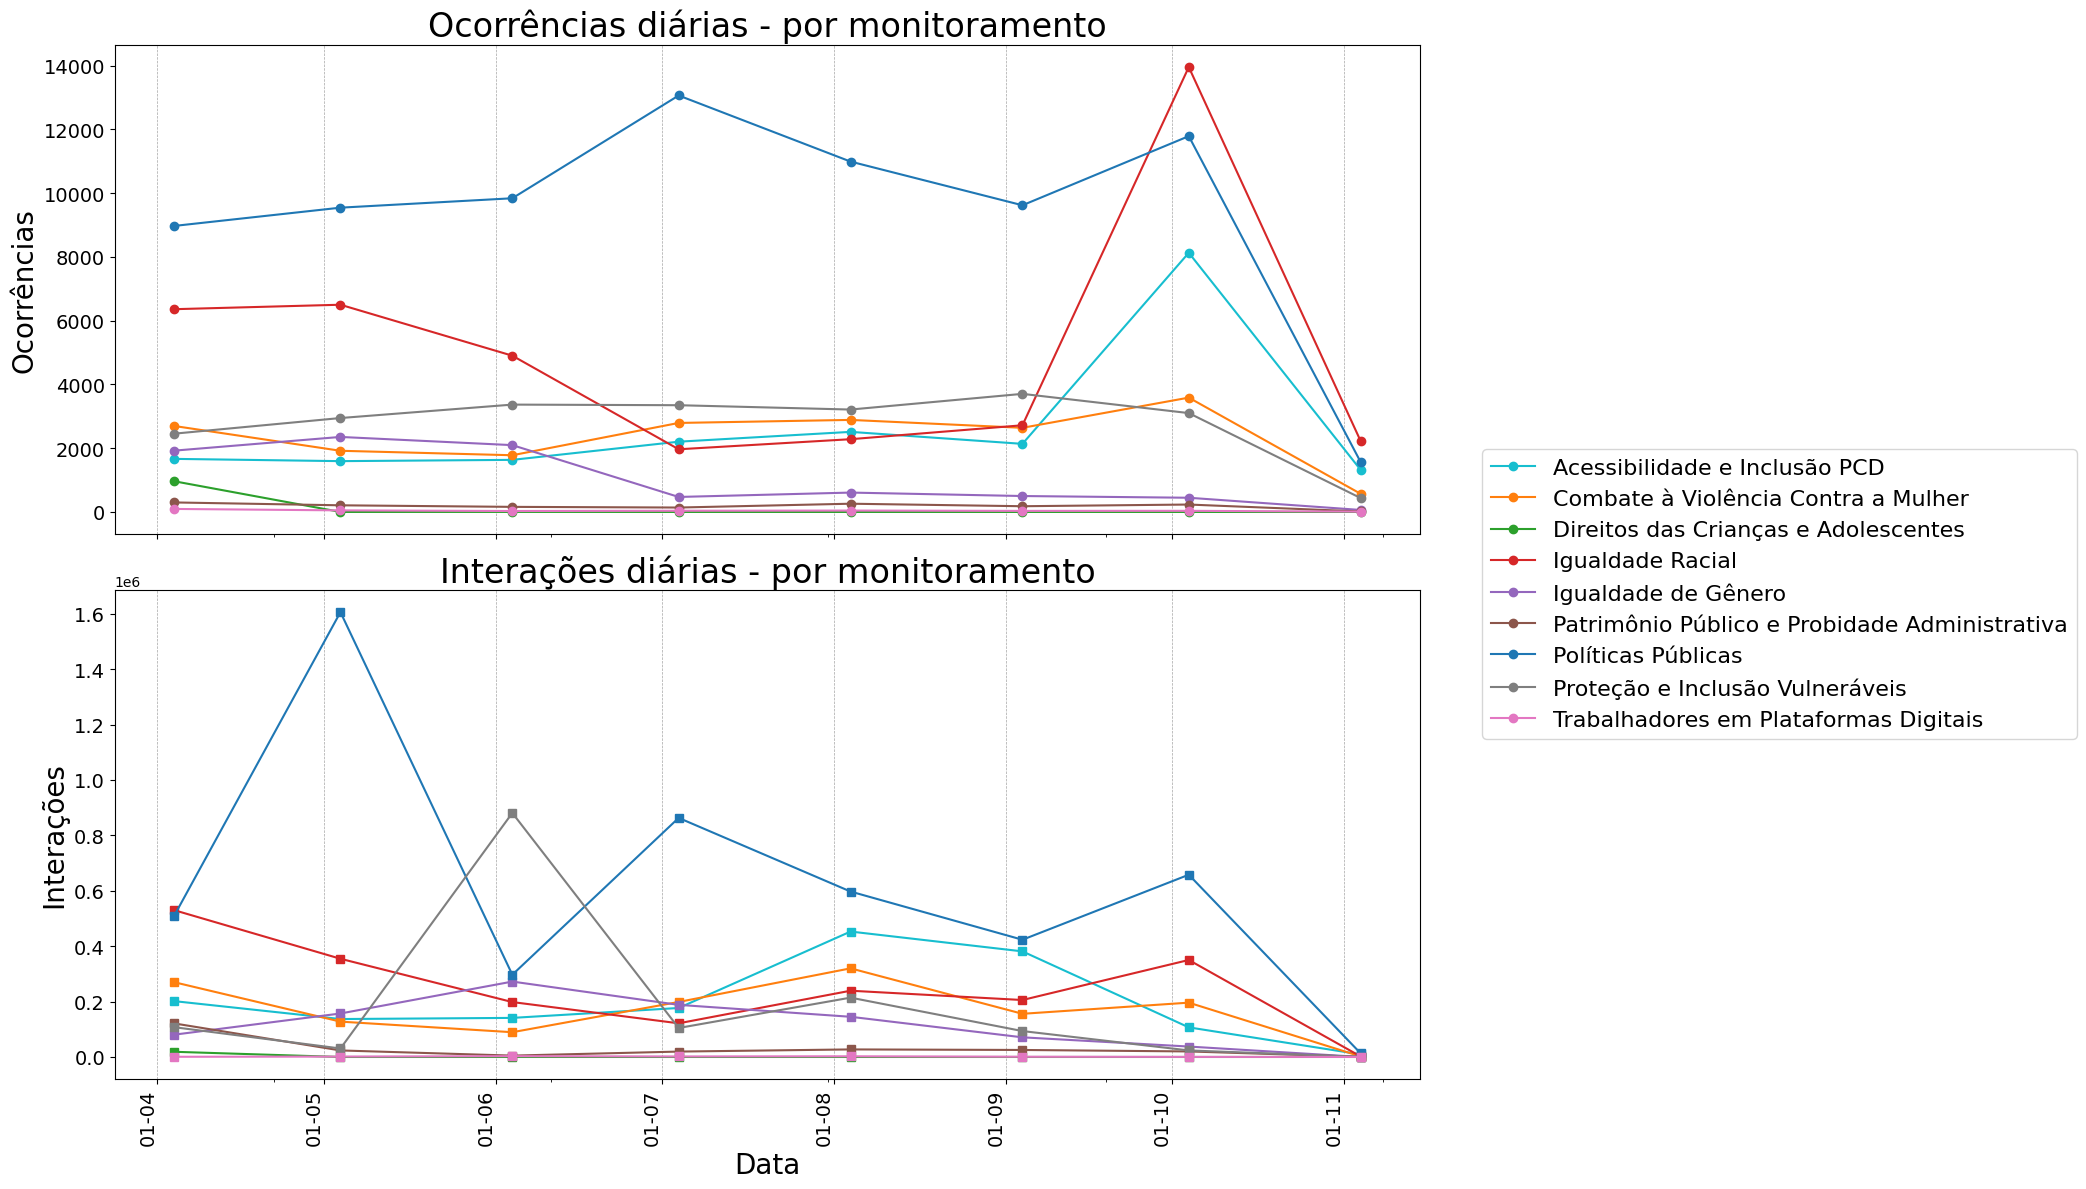

In [14]:
analisador.plota_grid_graficos_interacoes_e_ocorrencias_estilo_linha(
    df=df_unificado,
    top_title="por monitoramento",
    date_col="data",
    monitoramento_col="monitoramento_nome.keyword",
    ocorrencia_col="conteudo.keyword",
    interacoes_col="interacoes",
    figsize=(18, 12),
    title_fontsize=24,
    label_fontsize=20,
    legend_fontsize=16,
    tick_labelsize=14
)

#Gráfico de ocorrências e interações diárias por monitoramento (área) - passe o mouse sobre o gráfico para ver o picos

In [15]:
analisador.plota_grid_graficos_interacoes_e_ocorrencias_area_interativo(
    df=df_unificado,
    top_title="Gráfico",
    date_col="data",
    monitoramento_col="monitoramento_nome.keyword",
    ocorrencia_col="conteudo.keyword",
    interacoes_col="interacoes"
)

#Gráfico de ocorrências e interações diárias por monitoramento (área)

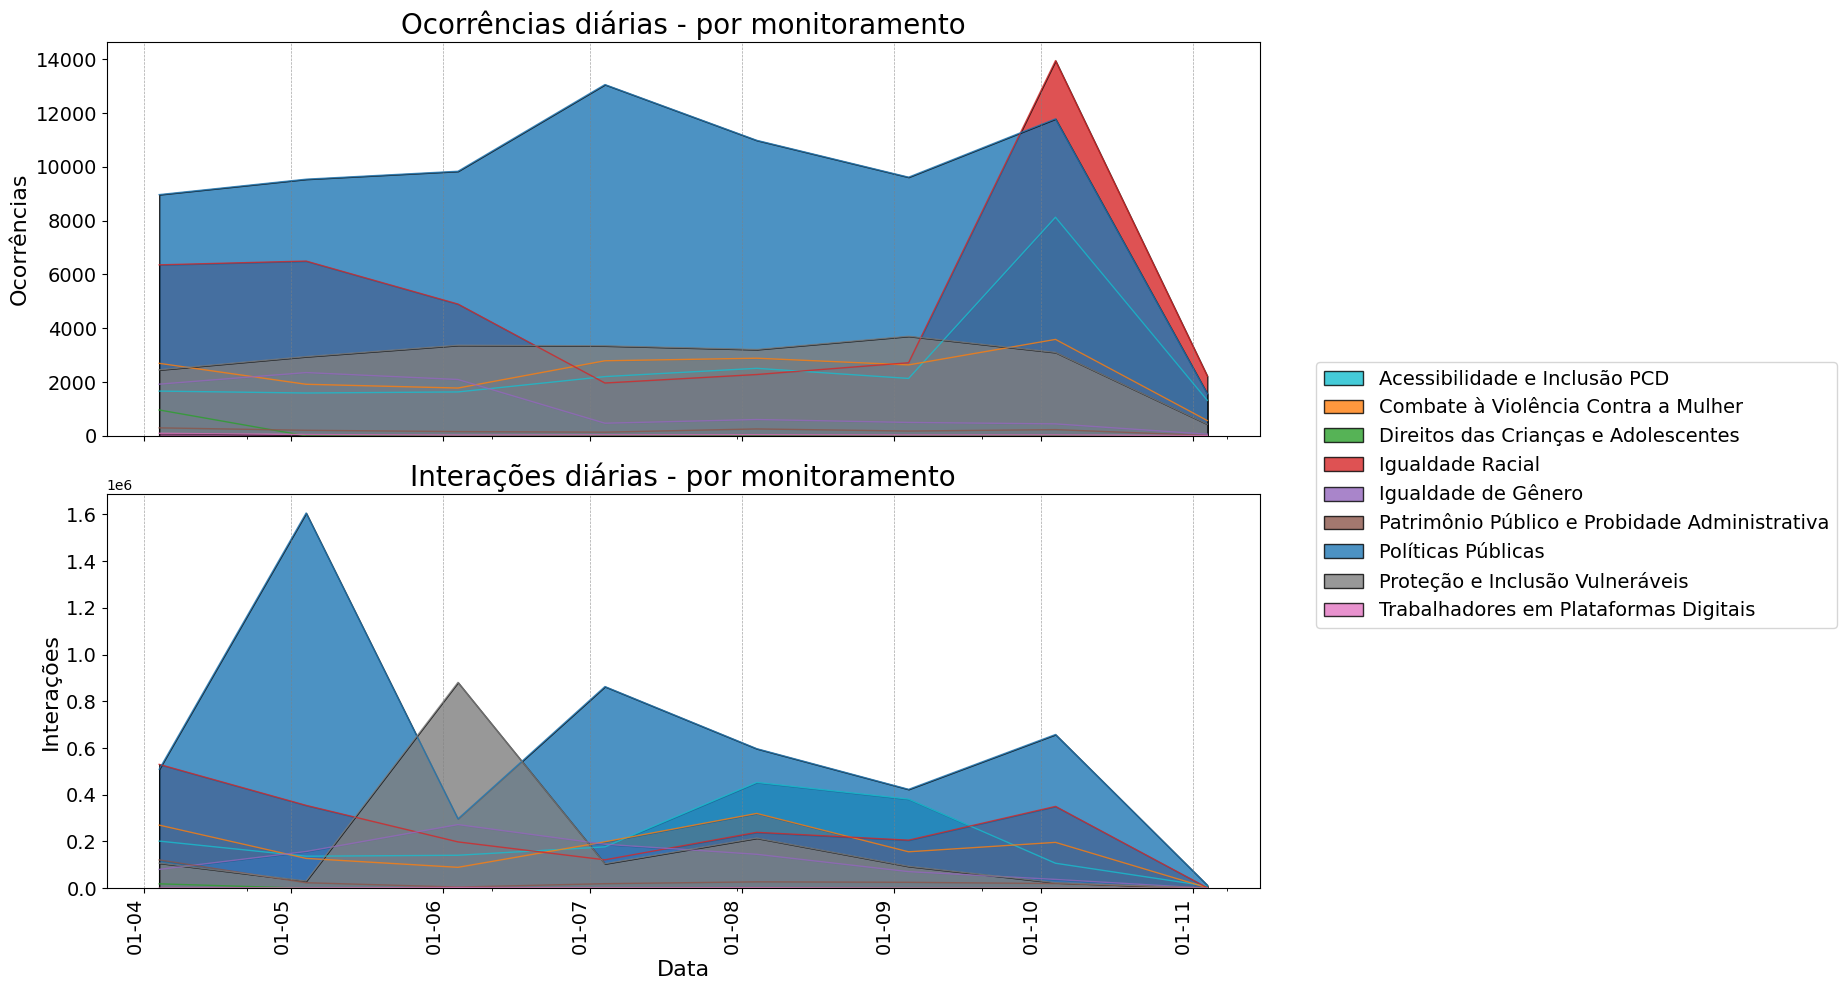

In [16]:
analisador.plota_grid_graficos_interacoes_e_ocorrencias_estilo_area(
    df=df_unificado,
    top_title="por monitoramento",
    date_col="data",
    monitoramento_col="monitoramento_nome.keyword",
    ocorrencia_col="conteudo.keyword",
    interacoes_col="interacoes",
    save_path=output_folder + 'grafico_geral_area.png'
)

##6. Cria uma tabela dinâmica com os top N posts com mais interações a partir da escolha do monitoramento por um dropdrown

A tabela exibe um máximo de 20 mil linhas. Você pode selecionar a quantidade de linhas da tabela  na variável quantidade_linhas



```
quantidade_linhas = 1000
```



In [22]:
#preencha a quantidade máxima de linhas que gostaria de visualizar aqui. Valores entre 1 e 20000
quantidade_linhas = 1000

In [23]:
# Selecionando as colunas de índice 0 a 6, mais 9 e 14 - isso remove as colunas desnecessárias para a análise
colunas_escolhidas = ['data',
 'monitoramento_nome.keyword',
 'servico.keyword',
 'publicador_nome.keyword',
 'titulo',
 'conteudo.keyword',
 'link.keyword',
  'query',
 'interacoes',
]

df_unificado_resumido = df_unificado[colunas_escolhidas]

# Cria rótulos no formato dia-mês para exibição no eixo X
df_unificado_resumido.loc[:, 'data'] = pd.to_datetime(df_unificado_resumido['data']).dt.strftime('%d-%m-%Y')

# Cria o dropdown usando os valores únicos da coluna
options = df_unificado_resumido["monitoramento_nome.keyword"].unique().tolist()
dropdown_monitoramento = widgets.Dropdown(
    options=options,
    description="Monitoramento"
)

# Cria um Output para exibir os resultados
out = widgets.Output()

def atualiza_display(change):
    if change["type"] == "change" and change["name"] == "value":
        with out:
            clear_output()  # Limpa o output anterior
            monitoramento_valor = change["new"]

            # Filtra o DataFrame com base no valor do dropdown
            df_filtrado = df_unificado_resumido[
                df_unificado_resumido["monitoramento_nome.keyword"] == monitoramento_valor
            ]

            df_filtrado_sorted = df_filtrado.sort_values(
                by="interacoes", ascending=False
            )

            # Exibe as primeiras linhas do DataFrame filtrado
            display(df_filtrado_sorted.head(quantidade_linhas))

# Liga o callback ao dropdown
dropdown_monitoramento.observe(atualiza_display, names="value")

# Exibe o widget e a área de output
display(dropdown_monitoramento)
display(out)

Dropdown(description='Monitoramento', options=('Políticas Públicas', 'Proteção e Inclusão Vulneráveis', 'Comba…

Output()